# Logistic regression

## Binary logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

Ex. 0.: Please get yourself familiar with the data.

In [2]:
# Ex 0
data.head(10)

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [3]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


**Goal**: In data you can find two dependent variables (features) - Exam 1 and Exam 2. 

Our goal is to determine whether a student has been admitted to the university on the basis of exam results or not (target - Admitted ). The prediction/explanation Y takes two possible values/classes - we are dealing with a binary classification. A value of 1 means that the student was admitted and a value of 0 means that the student was not admitted.

Ex. 1.: Please follow the steps below:

- divide the data into parameters (X) and labels/classes (y)

In [4]:
X = data.values[:, :2].T
y = data.values[:, 2:].T

- create theta vector

In [5]:
theta = np.zeros((X.shape[0]+1, 1))

- add a row with values '1' on the top of the X matrix

In [6]:
X = np.concatenate([np.ones([1, X.shape[1]]), X])

- normalize features of X matrix

In [7]:
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

Ex. 2.: Please plot the loaded data in the graph (using scatter plot). Can be both: a 2D plot with marks colored regarding to the class or a 3D plot with the class showed as 3rd dimension.

<AxesSubplot:xlabel='Exam 1', ylabel='Exam 2'>

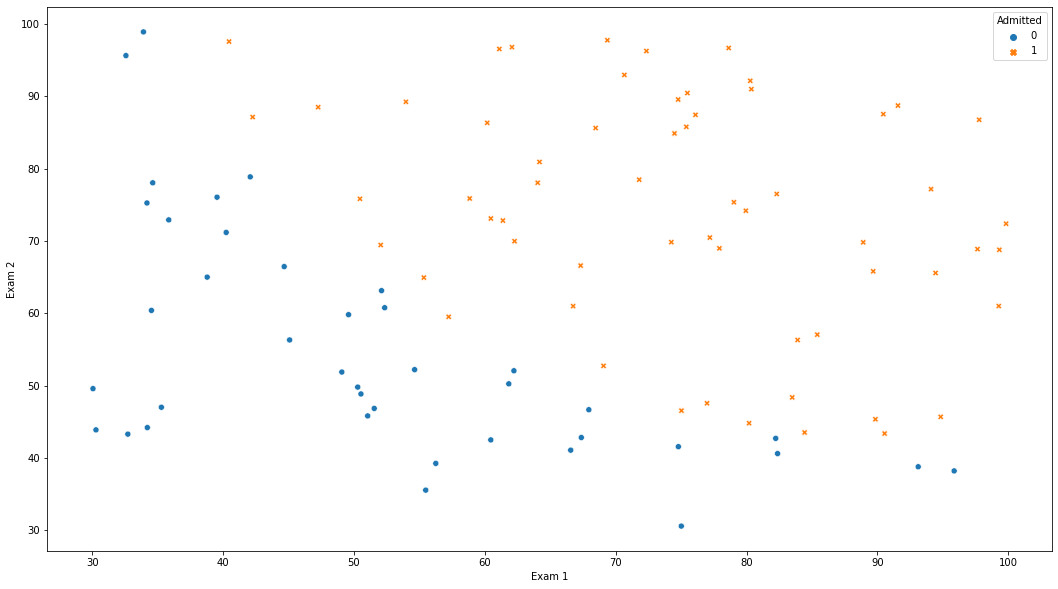

In [8]:
figure(figsize=(18, 10))
sns.scatterplot(data = data, x = 'Exam 1', y = 'Exam 2', hue = 'Admitted', style = 'Admitted')

Ex.3: Please implement a logistic function (sigmoid):

In [9]:
def sig(t):
    result = 1.0 / (1.0 + np.exp(-t))
    return result

Ex. 4.: Using the function np.arange or np.linspace, please generate data from the range [-5.5], step 0.5 and check the correct operation of the implemented function by plotting it. 

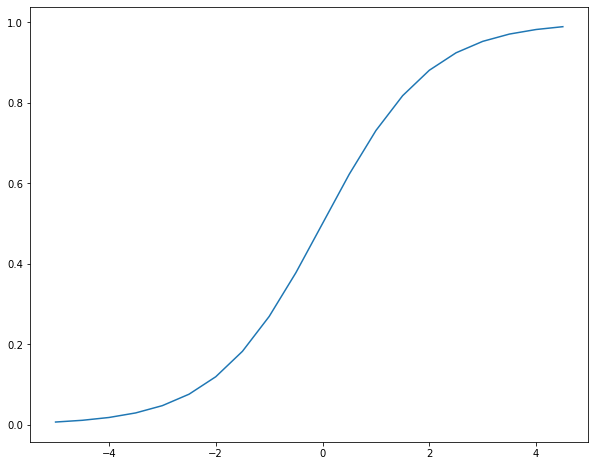

In [10]:
# Ex 4
t = np.arange(-5, 5, 0.5)

arr = []

for i in t:
    arr.append(sig(i))

figure(figsize=(10, 8))
plt.plot(t, arr)


Ex. 5. Based on the above formulas, please implement the cost function J (recommended vectorized solution):

In [11]:
# Ex 5

def cost(theta, X, y):
    m = X.shape[1]
    h0 = sig(theta @ X)
    J = 1/m * ((-y) @ (np.log(h0)) - (((1 - y)) @ np.log(1 - h0)))
    return J

To test the cost function, please initialize the θ values:

In [12]:
theta = np.zeros((X.shape[0]))

print('The test value of the cost function with theta initialized: {}'.format(cost(theta, X, y)))

The test value of the cost function with theta initialized: [0.69314718]


Ex. 6.: Please implement simple gradient function:

In [31]:
#Ex 6

def simple_gradient(X, y, theta, alpha, it):
    m = X.shape[1]
    cost_arr = []

    for i in range(it):
        h0 = sig(theta @ X)
        for j in range(3):
            X_j = np.matrix(X[j, :]).T
            derivative = (1 / m) * ((np.sum((h0 - y) * X_j)))
            theta[j] = theta[j] - (alpha * derivative)
            cost_arr.append(cost(theta, X, y))
 
    return theta, cost_arr

For the parameter alpha = 1 and 150 iterations, the cost function is around 0.20 and the values of θ [1.65947664], [3.8670477], [3.60347302]. Results may vary.

In [24]:
alpha = 1
it = 150

theta, cost_arr = simple_gradient(X, y, theta, alpha, it)

In [25]:
print(theta)
cost(theta, X, y)

[1.67508621 3.90029321 3.63563837]


array([0.2035522])

Ex. 7.: Please present the accuracy of the algorithm performance. Prediction values will be in the range [0; 1]. Threshold value = 0.5.

In [32]:
p = sig(theta @ X) >= 0.5

df2 = data[["Admitted"]]
df2.insert(loc=1, column = 'Prediction', value = p.astype(int))
df2

,Admitted,Prediction
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
95,1,1
96,1,1
97,1,1
98,1,0


In [33]:
accuracy = len(df2[(df2['Admitted'] == df2['Prediction'])])/len(df2)
accuracy

0.89

Ex. 8.: It is sometimes useful to be able to visualize the boundary line dividing the input space in which points are classified as belonging to the class of interest (y = 1) from that space in which point do not (y = 0).

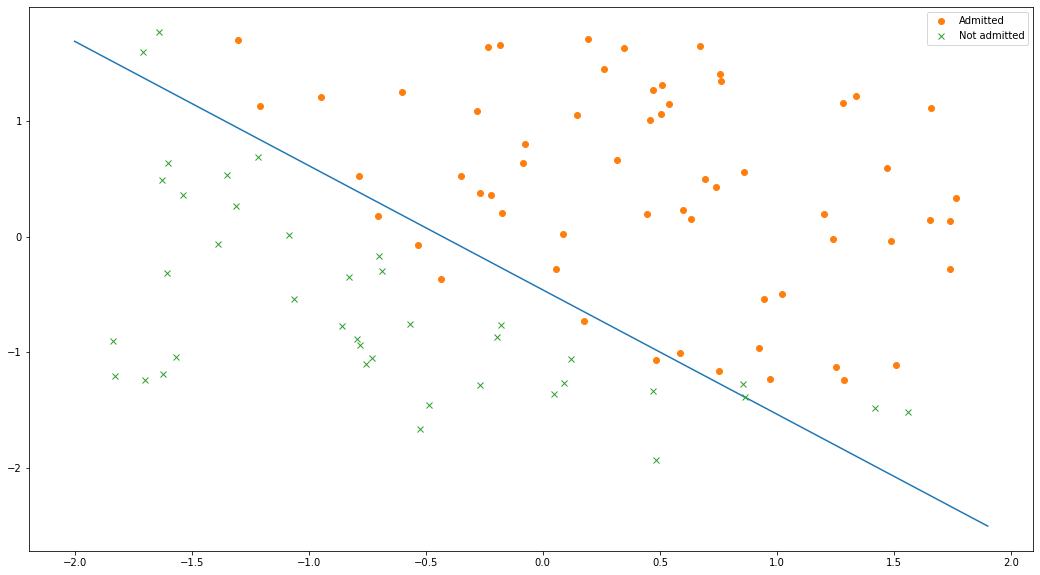

In [53]:
# Ex 8 

figure(figsize=(18, 10))
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0]/theta[2] - theta[1]/theta[2] * x1
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'o', label = 'Admitted')
plt.plot(X1_0, X2_0, 'x', label = 'Not admitted')
plt.legend()
plt.show()

## Logistic regression - Python

An alternate solution to a “from scratch” logistic regression implmentation is the scikit-learn lib with its LogisticRegression classifier.

### Multi-class logistic regression

Please import basic libaries/packets and “Iris” database:

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

Ex. 1.: Get yourself familiar with the object sklearn.linear_model.LogisticRegression and choose appropriate optimalization algorithm, regularization coefficient and create a regression model.

Ex. 2.: Create an instance and fit the data using fit method.

In [105]:
# Ex 1 & 2
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
logreg.fit(X_train, y_train)

LogisticRegression()

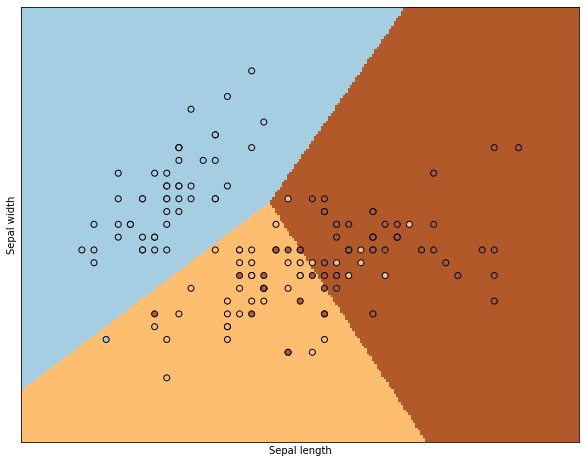

In [63]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
figure(figsize=(10, 8))
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

Ex. 3.: Using method predict_proba please predict the probability of being a member of a given class.

In [77]:
# Ex 3

y_pred_probs = logreg.predict_proba(X_test)

y_pred_probs_class1 = y_pred_probs[:, 0]
y_pred_probs_class2 = y_pred_probs[:, 1]
y_pred_probs_class3 = y_pred_probs[:, 2]

print('Probability of being a member of class 1 on the first observation: {:.2f}'.format(y_pred_probs_class1[0]))
print('Probability of being a member of class 2 on the first observation: {:.2f}'.format(y_pred_probs_class2[0]))
print('Probability of being a member of class 3 on the first observation: {:.2f}'.format(y_pred_probs_class3[0]))

Probability of being a member of class 1 on the first observation: 0.96
Probability of being a member of class 2 on the first observation: 0.03
Probability of being a member of class 3 on the first observation: 0.01


Ex. 4.: Evaluation - please assess the accuracy of the algorithms using a variety of metrics (at least 2).

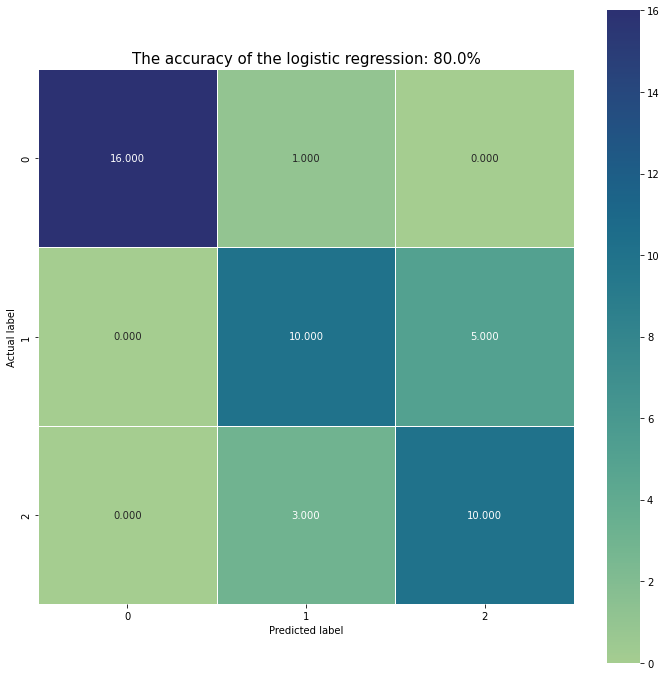

In [96]:
# Ex 4 - method 1

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
score_percent = accuracy_score(y_test, y_pred) * 100

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'crest');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'The accuracy of the logistic regression: {}%'.format(score_percent)
plt.title(title, size = 15);

In [104]:
# Ex 4 - method 2

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv=5)
scores = pd.Series(scores)

print('Minimum accuracy score: {:1f}'.format(scores.min()*100))
print('Maximum accuracy score: {:1f}'.format(scores.max()*100))
print('Average accuracy score: {:1f}'.format(scores.mean()*100))

Minimum accuracy score: 76.190476
Maximum accuracy score: 85.714286
Average accuracy score: 80.000000
